## Lab 6.1

Because of the midterm on Thursday and because of the amount of review we do today in the Lab both of these activities have due dates for the Brightspace quizzes on Monday March 1, 9:30am.

### Activity 1 
Name: `2integrals`, `maxgradadd`

Complete  activity 1 before the end of the lab by entering the answer into the CourseSpaces quiz.

Given are the following functions 

$$h(y) = \frac{y^3}{exp(-y)}$$ 

for $y\in[-2.3,0.25]$

$$g(x) = sin(x^2)\frac{x^2}{exp(-\frac{x}{2})}$$ for  $x\in[-2.5,0.25]$ 

1. Make a line plot of both functions in the same diagram, with solid lines of different color.
2. Integrate both function over their respective range using `scipy.integrate.trapz`, using for both x and y arrays with 100 equidistant intervals. Add the numbers and round to two decimals, and enter into quiz `2integrals`.
3. Calculate g and h arrays from x and y input arrays, and use `numpy.gradient` to calculate the derivatives. Add these with dashed lines to the same plot as in 1. Find the max of the gradient of each function within the range. Add the two value, round to two decimals and enter into quiz `maxgradadd`.

**Solution:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

2integrals: -1.29
maxgradadd = 5.86


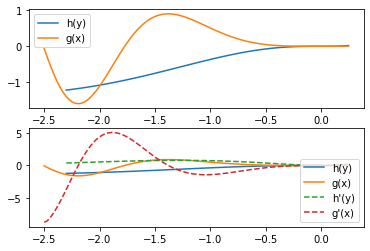

In [3]:
#1
N = 100
y = np.linspace(-2.3, .25, N)
h = lambda y: y**3/np.exp(-y)
x = np.linspace(-2.5, .25, N)
g = lambda x: np.sin(x**2)*x**2/np.exp(-x/2)


#subplots: f=figure (hence f.show), ax=where you'll be plotting (maybe ax=axises??)
#not what i wanted but it looks neat
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) 
ax1.plot(y,h(y), label='h(y)')
ax1.plot(x,g(x),label='g(x)')
ax1.legend()
f.show()

#2
htrapz = integrate.trapz(h(y),y)
gtrapz = integrate.trapz(g(x),x)
print('2integrals: {:.2f}'.format(htrapz+gtrapz))

#3
#gradient returns an array representing the derivative(/gradient) at each point of the function 
# (which makes sense, you're not hoping for a function to be returned, you want the value of the deriv)
ggrad = np.gradient(g(x), x)
hgrad = np.gradient(h(y),y)

#plot to same figure as in #1. use same ax, f
#nope doesn't work, so just make a new one and copy the plots from before
#f2, ax2 = plt.subplots(1)
ax2.plot(y,h(y), label='h(y)')
ax2.plot(x,g(x),label='g(x)')
ax2.plot(y,hgrad, '--', label="h'(y)")
ax2.plot(x,ggrad, '--', label="g'(x)")
ax2.legend(loc='lower right')
f.show()

maxgradadd = max(ggrad)+max(hgrad)
print("maxgradadd = %.2f"%maxgradadd)

### Activity 2
Name: `2dmcint`



Consider 
$$ z(x,y) = h(y) + g(x)$$ for ranges 
```
yrange = (0.3,1.7)
xrange = (-1.5,1)
```

1. Make a `plot_surface` and a `contour` plot of the function.
2. Write a function `mcint2d` that uses the mean-value method to approximate that integral of a 2D function. 
3. Test your function by applying it to a case where you know the answer. 
4. Then, use the function to calculate the integral of $z(x,y)$ over the specified $(x,y)$ range. Make the number of MC random numbers large enough so that the result does not change by more than $1\%$ over 5-10 repeats. Round the result to one decimal and enter into quiz `2dmcint`.

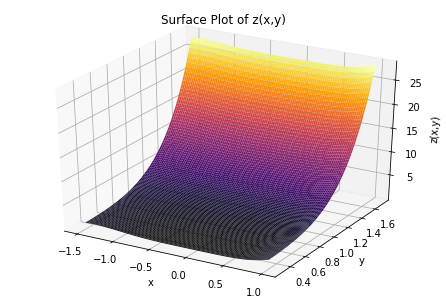

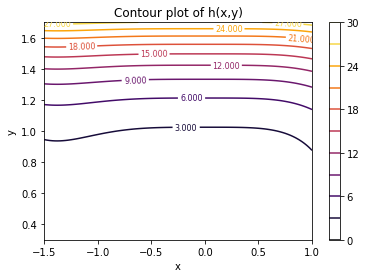

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

yrange = np.linspace(.3,1.7,101)
xrange = np.linspace(-1.5,1,101)
xv, yv = np.meshgrid(xrange, yrange)
z = lambda xv,yv: h(yv) + g(xv)

#1
#surface plot
plt.close(1); fig = plt.figure(1)
ax = Axes3D(fig)
ax.plot_surface(xv,yv,z(xv,yv), rstride=1, cstride=1, cmap=cm.inferno)
plt.title('Surface Plot of z(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z(x,y)')
fig.show()

plt.close(2); fig = plt.figure(2)
CS = plt.contour(xv, yv, z(xv,yv), 10, cmap='inferno')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour plot of h(x,y)")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

Write a function mcint2d that uses the mean-value method to approximate that integral of a 2D function.

In [4]:
#3
#x and y are *added* to the random generated numbers.
#note: this only works for 1D and 2D functions
def mcint2d(func,xrange,yrange,N):
    '''MC integration of function func over xrange - mean-value method'''
    Dx = np.diff(xrange)[0] #xmax - xmin
    Dy = np.diff(yrange)[0]
    x = Dx*np.random.rand(N)+xrange[0]
    y = Dy*np.random.rand(N) + yrange[0] #want to add random number w/in range(Dy) to yrange[0] st it's in (.3,1.7)
    f = func(x,y)
    favg = func(x,y).mean()
    I = favg* Dx *Dy
    #print(Dx,Dy,x,y)
    return I

myf = lambda x,y: x*np.sin(y)

xrange = np.array((-1.5,1))
yrange = np.array((.3,1.7))

I = mcint2d(myf, xrange, yrange,int(1000000)) #here, 1e7 is the limit

print('int(x*sin(y)) = %.6f' %I)

print("true value for I = -.677613")

int(x*sin(y)) = -0.677823
true value for I = -.677613


Then, use the function to calculate the integral of  𝑧(𝑥,𝑦)  over the specified  (𝑥,𝑦)  range. Make the number of MC random numbers large enough so that the result does not change by more than  1%  over 5-10 repeats. Round the result to one decimal and enter into quiz 2dmcint.

In [13]:
#4
I=[]
for i in range(10):
    I.append(mcint2d(z, xrange, yrange, int(1e6)))


In [16]:
I = np.array(I)
print(.01*I)
print(I)
print("These all look good to me")
print("2dmcint answer: I=%.1f" %(np.mean(I)))

[0.22161895 0.22104339 0.22142308 0.2216123  0.22189677 0.22221412
 0.22145369 0.2215794  0.22145952 0.22157614]
[22.16189496 22.10433912 22.14230824 22.16123035 22.18967734 22.22141153
 22.14536872 22.15794032 22.14595183 22.15761441]
These all look good to me
2dmcint answer: I=22.2
